# Intro - Problem Statement

In [1]:
# Ok, so our goal is to predict a iris flower's class given its attributes of:
# sepal length, sepal width, petal length, and petal width

In [2]:
# Import libraries and read in data:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

idata = pd.read_csv(r'''C:\Users\casey\Desktop\Coding Practice\Data Scientist 2020 Learning Path\March\Data\Iris Data.csv''')
idata_original = idata.copy()
print(idata.shape)
idata.head()

(150, 5)


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# It's a small dataset, with only 150 rows and 5 columns
# Fortunately, the data has no missing values to start with

#Let's look at some descrriptive stats:
idata.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
print(idata['Class'].value_counts())

#So it's evenly split 3 ways, each class has 1/3 of the entries

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Class, dtype: int64


# Visualizing Data

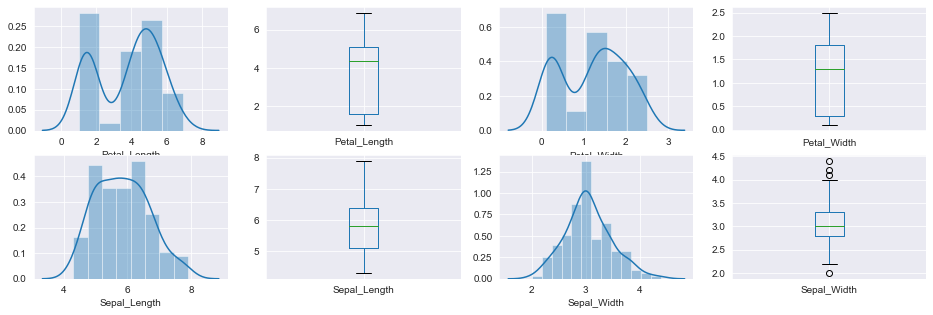

In [5]:
#Plots of the 4 features for all 150 columns:
sns.set_style("darkgrid")

plt.figure(1)
plt.subplot(241)
sns.distplot(idata['Petal_Length']);
plt.subplot(242)
idata['Petal_Length'].plot.box(figsize=(16,5))

plt.subplot(243)
sns.distplot(idata['Petal_Width']);
plt.subplot(244)
idata['Petal_Width'].plot.box(figsize=(16,5))

plt.subplot(245)
sns.distplot(idata['Sepal_Length']);
plt.subplot(246)
idata['Sepal_Length'].plot.box(figsize=(16,5))

plt.subplot(247)
sns.distplot(idata['Sepal_Width']);
plt.subplot(248)
idata['Sepal_Width'].plot.box(figsize=(16,5))

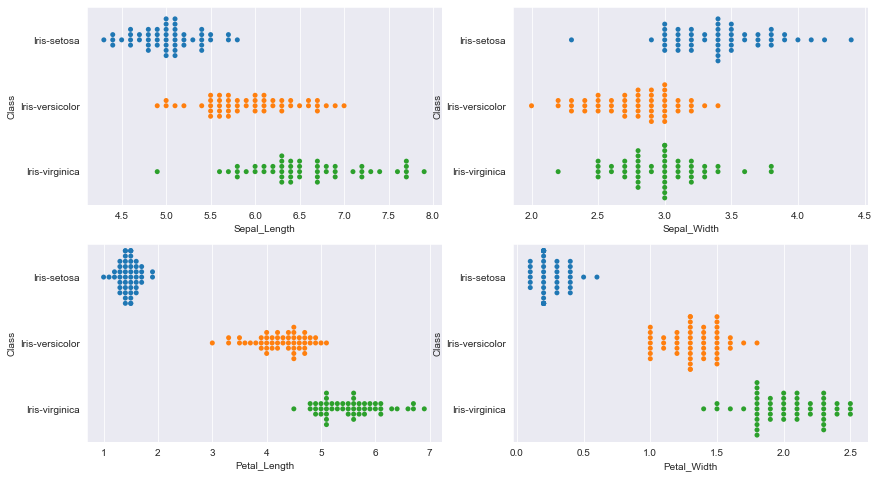

In [86]:
#For comparing to class, I think swarmplots would be best, 
#since there's only 3 vals in class and the dataset is small

plt.figure(1, figsize=(14,8))
plt.subplot(221)
sns.swarmplot(x=idata['Sepal_Length'], y=idata['Class'])

plt.subplot(222)
sns.swarmplot(x=idata['Sepal_Width'], y=idata['Class'])

plt.subplot(223)
sns.swarmplot(x=idata['Petal_Length'], y=idata['Class'])

plt.subplot(224)
sns.swarmplot(x=idata['Petal_Width'], y=idata['Class'])

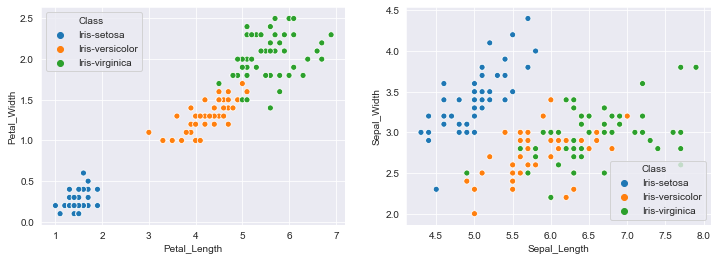

In [7]:
#so it seems petal length and petal width have the strongest correlation to class
#but sepal length/width have some distinction as well
plt.figure(1, figsize=(12, 4))
plt.subplot(121)
sns.scatterplot(x=idata["Petal_Length"], y=idata['Petal_Width'], hue=idata["Class"])
plt.subplot(122)
sns.scatterplot(x=idata["Sepal_Length"], y=idata['Sepal_Width'], hue=idata["Class"])


# Model Building

In [81]:
#Since petal length and width seemed the most correlated, I'll try making
# a model using just those 2 first:

useful_features=['Petal_Length', 'Petal_Width']
X = idata[useful_features]
y = pd.get_dummies(idata.Class)

#split the data into training and validation:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

In [82]:
# I'm not sure what'll work best here, so I'll start with a random forest:

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=3, max_depth=5, random_state=0)
model.fit(train_X, train_y)

predictions = model.predict(val_X)

# I noticed the model was splitting the predictions between 2 classes a bit, so I modified it to separate them out
for i in range(len(predictions)):
    for j in range(len(predictions[i])):
        if predictions[i][j] > 0 and predictions[i][j] <= 0.5: predictions[i][j] = 0
        if predictions[i][j] > 0.5 and predictions[i][j] < 1: predictions[i][j] = 1

from sklearn.metrics import accuracy_score
accuracy_score(val_y, predictions)

0.9736842105263158